Import data and required packages

In [63]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import CSV file

In [5]:
df=pd.read_csv(r"C:\Users\janha\Desktop\mlproject\notebook\data\stud.csv")

In [6]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
print(f"Unique values of gender {df['gender'].unique()}")
print(f"Unique values of race {df['race/ethnicity'].unique()}")
print(f"Unique values of parental level of education {df['parental level of education'].unique()}")
print(f"Unique values of lunch {df['lunch'].unique()}")
print(f"Unique values of test preparation course {df['test preparation course'].unique()}")

Unique values of gender ['female' 'male']
Unique values of race ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values of parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values of lunch ['standard' 'free/reduced']
Unique values of test preparation course ['none' 'completed']


In [20]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(f"Numerical Features: {len(numerical_features)}, {numerical_features}")
print(f"Categorical Features: {len(categorical_features)}. {categorical_features}")

Numerical Features: 3, ['math score', 'reading score', 'writing score']
Categorical Features: 5. ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [21]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [33]:
reading_full=df[df['reading score']==100].shape[0]
writing_full=df[df['writing score']==100].shape[0]
math_full=df[df['math score']==100].shape[0]
print(f"Number of students with full score in reading: {reading_full}")
print(f"Number of students with full score in writing: {writing_full}")
print(f"Number of students with full score in math: {math_full}")

Number of students with full score in reading: 17
Number of students with full score in writing: 14
Number of students with full score in math: 7


In [46]:
reading_lessthan20=df[df['reading score']<=20].shape[0]
writing_leassthan20=df[df['writing score']<=20].shape[0]
math_leassthan20=df[df['math score']<=20].shape[0]
print(f"Number of students with less than 20 in reading: {reading_lessthan20}")
print(f"Number of students with less than 20 in writing: {writing_leassthan20}")
print(f"Number of students with less than 20 in math: {math_leassthan20}")

Number of students with less than 20 in reading: 1
Number of students with less than 20 in writing: 3
Number of students with less than 20 in math: 4


<Axes: xlabel='average', ylabel='Count'>

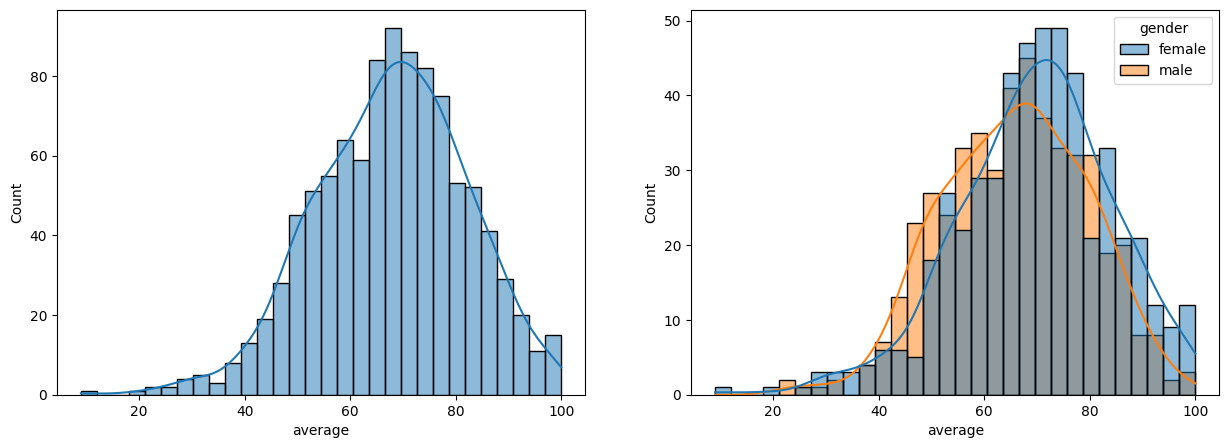

In [52]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',kde=True,bins=30)
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',kde=True,bins=30,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

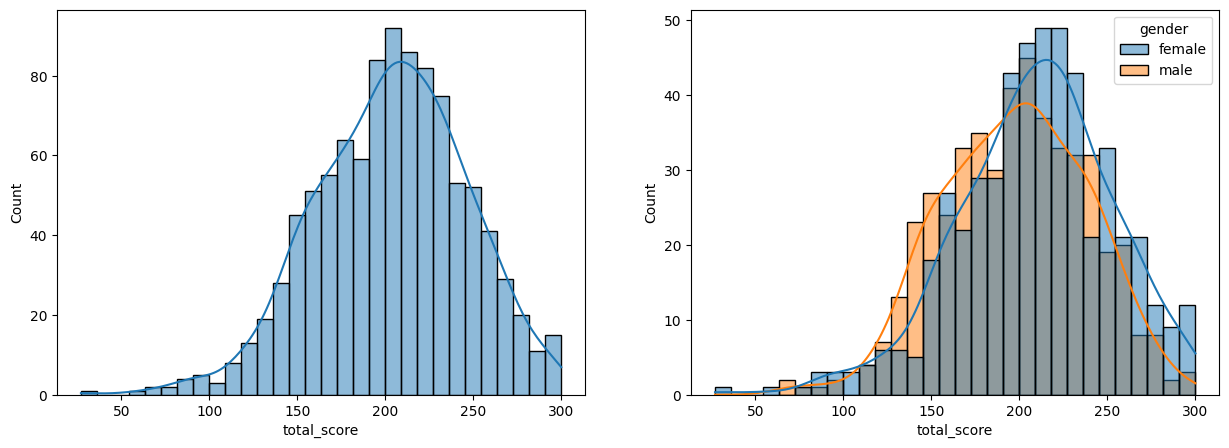

In [53]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',kde=True,bins=30)
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',kde=True,bins=30,hue='gender')

Insights::
Female students have a higher average score and total score

<Axes: xlabel='average', ylabel='Count'>

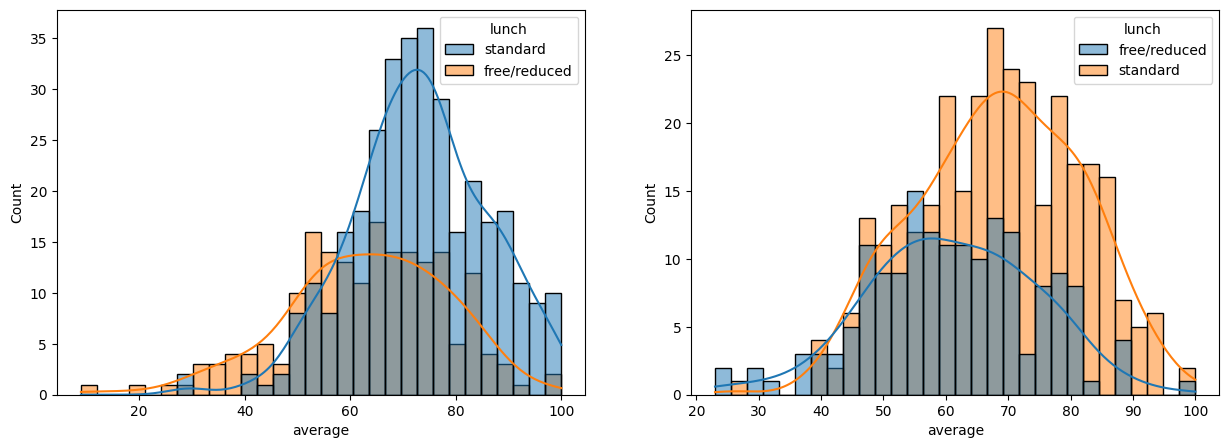

In [55]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,bins=30,hue='lunch')
plt.subplot(1,2,2)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,bins=30,hue='lunch')

Insights:
Standard lunch students have a higher average score than free/reduced lunch students for both male and female

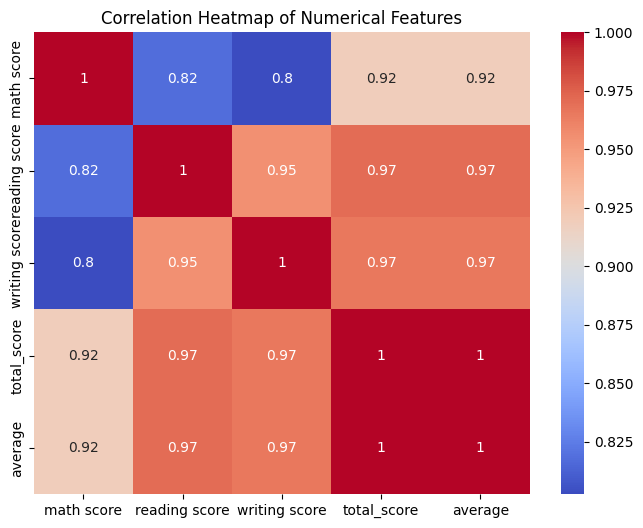

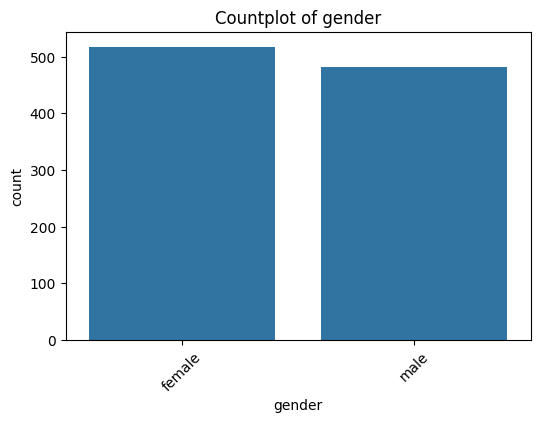

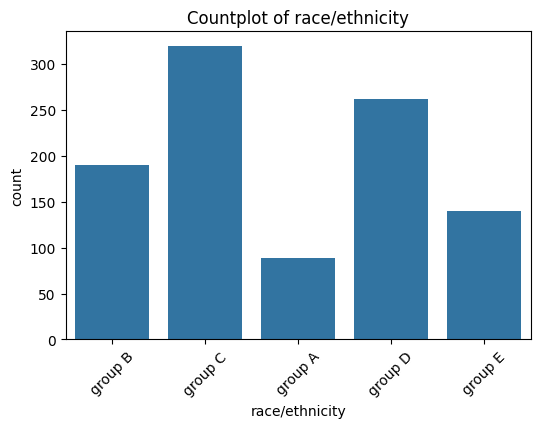

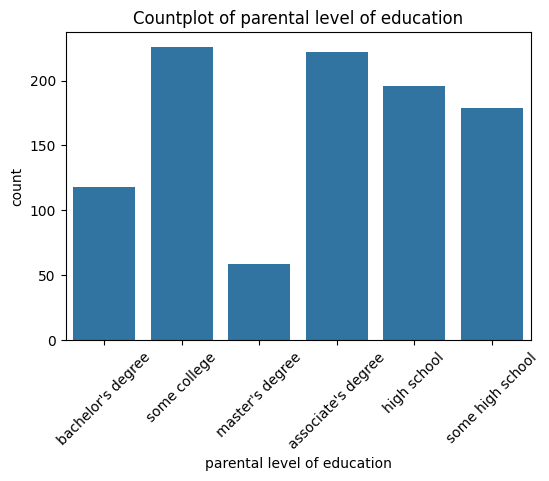

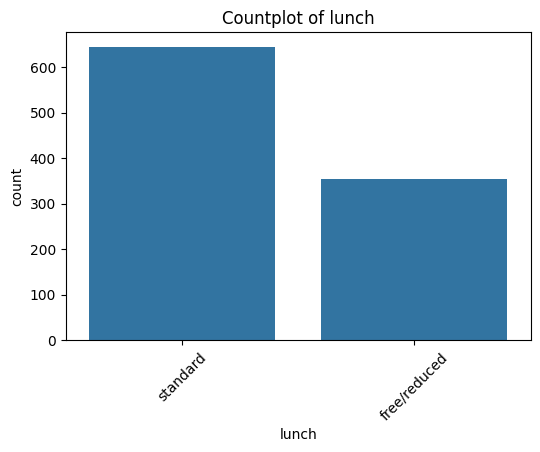

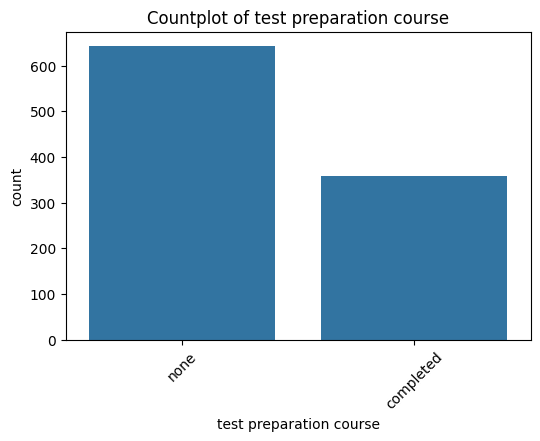

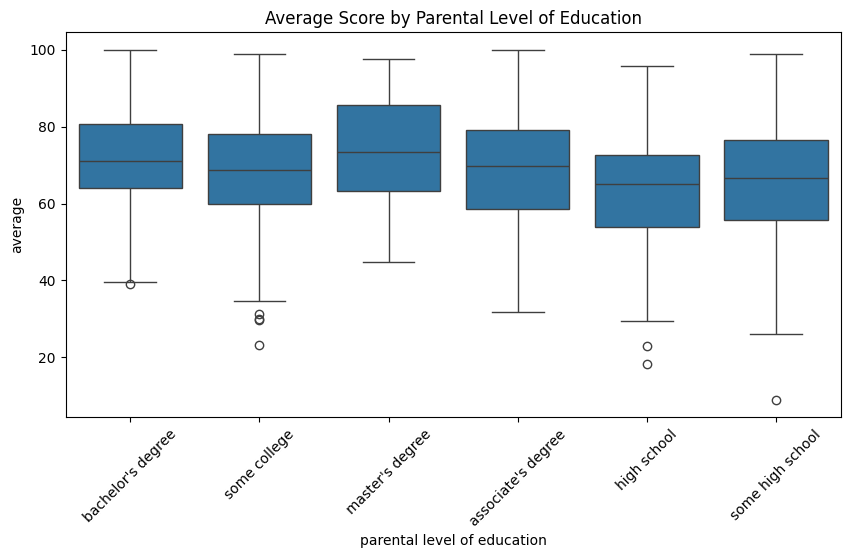

In [58]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features + ['total_score', 'average']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Countplot for categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Boxplot of average score by parental level of education
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='parental level of education', y='average')
plt.title('Average Score by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()